###The two-dimensional time-frequency images of class1, class2, class3 are given in the folders as class1.zip, class2.zip, class3.zip, respectively. Design a 2D deep CNN classifier for the three-class classification. Evaluate the classification performance using hold-out cross-validation (70% training, 10% validation, 20% testing), and 10-fold cross-validation methods. Evaluate individual accuracy and overall accuracy for the multiclass CNN classifier. You can consider 4 convolutional layer, three pooling layer, and 5 fully connected layers. You can select the number of filters, stride for convolution and pooling layers, and number of neurons for fully connected layers as per your own choice. (Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are allowed). You can apply dropout, batch normalization, and regularization to improve the classification performance.

In [1]:
#Import all the required libraries
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from matplotlib import image
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
import cv2
import os
import numpy as np
from sklearn.utils import shuffle

####Hold out validation method

In [ ]:
root = "/content/drive/MyDrive/Class_images"
cats=["class1_images","class2_images","class3_images"]
bsize=12
train=tf.keras.preprocessing.image_dataset_from_directory(
    root,
    label_mode="int",
    class_names=cats,
    color_mode="rgb",
    batch_size=bsize,
    image_size=(656, 875),
    shuffle=True,
    seed=123,
    validation_split=0.3 ,
    subset="training"
)

test=tf.keras.preprocessing.image_dataset_from_directory(
    root,
    label_mode="int",
    class_names=cats,
    color_mode="rgb",
    batch_size=bsize,
    image_size=(656, 875),
    shuffle=True,
    seed=123,
    validation_split=0.3 ,
    subset="validation"
)

Found 721 files belonging to 3 classes.
Using 505 files for training.
Found 721 files belonging to 3 classes.
Using 216 files for validation.


In [13]:
#Defining the architecture of our CNN
TwoDCNN=models.Sequential()
TwoDCNN.add(layers.Conv2D(filters=10,kernel_size=(3,3),strides=1,padding='same',kernel_initializer='he_normal',activation='relu',input_shape=(656,875,3)))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
TwoDCNN.add(layers.Conv2D(filters=20,kernel_size=(3,3),strides=2,padding='same',kernel_initializer='he_normal',activation='relu'))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
TwoDCNN.add(layers.Dropout(0.7))
TwoDCNN.add(layers.Conv2D(filters=40,kernel_size=(3,3),strides=2,padding='same',kernel_initializer='he_normal',activation='relu'))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
TwoDCNN.add(layers.Conv2D(filters=60,kernel_size=(3,3),strides=2,padding='same',kernel_initializer='he_normal',activation='relu'))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(layers.Flatten())
TwoDCNN.add(layers.Dense(2000,kernel_initializer='he_normal', activation='relu'))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(layers.Dense(500,kernel_initializer='he_normal',activation='relu'))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(layers.Dense(200,kernel_initializer='he_normal',activation='relu'))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(layers.Dense(20,activation='relu'))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(layers.Dense(3,activation='relu'))
TwoDCNN.add(tf.keras.layers.BatchNormalization())
TwoDCNN.add(tf.keras.layers.Dense(3, kernel_initializer='he_normal', activation='softmax'))
TwoDCNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 656, 875, 10)      280       
_________________________________________________________________
batch_normalization (BatchNo (None, 656, 875, 10)      40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 328, 438, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 164, 219, 20)      1820      
_________________________________________________________________
batch_normalization_1 (Batch (None, 164, 219, 20)      80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 82, 110, 20)       0         
_________________________________________________________________
dropout (Dropout)            (None, 82, 110, 20)       0

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.000001)
TwoDCNN.compile(optimizer=optimizer,loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True)],metrics=['accuracy'])
history = TwoDCNN.fit(train,validation_data=test,epochs=25, verbose=1)

Epoch 1/25
43/43 [==============================] - 14s 320ms/step - loss: 1.0023 - accuracy: 0.5287 - val_loss: 1.2020 - val_accuracy: 0.3333
Epoch 2/25
43/43 [==============================] - 14s 318ms/step - loss: 0.8517 - accuracy: 0.7267 - val_loss: 0.8398 - val_accuracy: 0.7500
Epoch 3/25
43/43 [==============================] - 14s 318ms/step - loss: 0.7732 - accuracy: 0.8099 - val_loss: 0.8444 - val_accuracy: 0.7454
Epoch 4/25
43/43 [==============================] - 14s 321ms/step - loss: 0.7206 - accuracy: 0.8515 - val_loss: 0.7295 - val_accuracy: 0.8565
Epoch 5/25
43/43 [==============================] - 14s 319ms/step - loss: 0.6811 - accuracy: 0.9030 - val_loss: 0.7678 - val_accuracy: 0.7731
Epoch 6/25
43/43 [==============================] - 14s 315ms/step - loss: 0.6434 - accuracy: 0.9347 - val_loss: 0.7967 - val_accuracy: 0.7546
Epoch 7/25
43/43 [==============================] - 14s 318ms/step - loss: 0.6457 - accuracy: 0.9327 - val_loss: 0.9676 - val_accuracy: 0.5231

In [ ]:
pred=TwoDCNN.predict(test)
print(pred)

[[3.87883894e-02 1.10019566e-02 9.50209677e-01]
 [3.83164547e-02 9.45736587e-01 1.59469750e-02]
 [6.61401602e-04 9.98676717e-01 6.61757425e-04]
 [2.47281976e-03 3.83628765e-03 9.93690848e-01]
 [2.78524254e-02 9.63549078e-01 8.59849621e-03]
 [9.97388899e-01 1.16139604e-03 1.44975970e-03]
 [1.64121594e-02 8.59297812e-03 9.74994838e-01]
 [2.96594705e-02 3.59322354e-02 9.34408247e-01]
 [9.95235980e-01 3.64521728e-03 1.11884042e-03]
 [1.57931279e-02 9.75731909e-01 8.47506616e-03]
 [8.80416155e-01 9.86062288e-02 2.09776722e-02]
 [1.83305063e-03 9.96293604e-01 1.87326770e-03]
 [9.96630728e-01 1.50298630e-03 1.86625775e-03]
 [9.95292306e-01 3.65313422e-03 1.05454517e-03]
 [1.88604230e-03 3.38926399e-03 9.94724691e-01]
 [8.29767156e-03 6.65916922e-03 9.85043168e-01]
 [1.68823591e-03 9.96896148e-01 1.41560612e-03]
 [9.97111320e-01 1.26422383e-03 1.62444077e-03]
 [9.37555917e-03 9.69509721e-01 2.11147238e-02]
 [9.96626377e-01 1.43975404e-03 1.93389051e-03]
 [5.83720207e-03 9.92546737e-01 1.616013

18/18 [==============================] - 3s 140ms/step - loss: 0.5814 - accuracy: 0.9815
0.9814814925193787


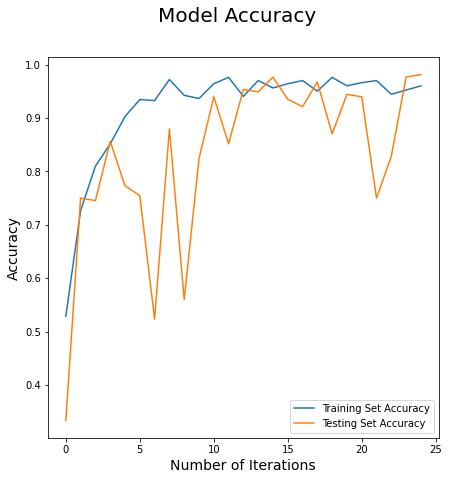

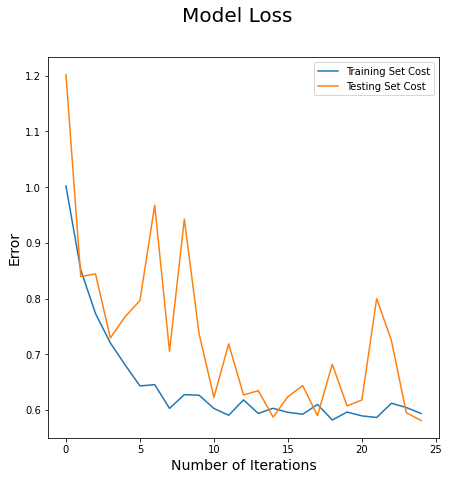

In [ ]:
#Outut
test_loss, test_acc =TwoDCNN.evaluate(test, verbose=1)
print(test_acc)

fig=plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
fig.suptitle('Model Accuracy', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.plot(history.history['accuracy'], label = 'Training Set Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Set Accuracy')
plt.legend()

fig=plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
fig.suptitle('Model Loss', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Error',fontsize=14)
plt.plot(history.history['loss'], label = 'Training Set Cost')
plt.plot(history.history['val_loss'], label = 'Testing Set Cost')
plt.legend()

####10-Fold cross validation method

In [2]:
root = "/content/drive/MyDrive/Class_images"
cats=["class1_images","class2_images","class3_images"]
dataset=[]
labels=[]
for cat in cats:
    path=os.path.join(root,cat)
    classn=cats.index(cat)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        dataset.append(img_array)
        labels.append(classn)


In [3]:
Dataset=np.array(dataset)
Labels=np.array(labels).reshape((721,1))
Dataset,Labels = shuffle(Dataset,Labels, random_state=121)
Optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.000001)
print(Dataset.shape)
print(Labels.shape)


(721, 656, 875, 3)
(721, 1)


In [4]:
kf = StratifiedKFold(n_splits=10, shuffle=True,random_state=111)
test_accuracies = []
count=0
for train, test in kf.split(Dataset,Labels ):
    count=count+1
    TwoDCNN=models.Sequential()
    TwoDCNN.add(layers.Conv2D(filters=10,kernel_size=(3,3),strides=1,padding='same',kernel_initializer='he_normal',activation='relu',input_shape=(656,875,3)))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
    TwoDCNN.add(layers.Conv2D(filters=20,kernel_size=(3,3),strides=2,padding='same',kernel_initializer='he_normal',activation='relu'))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
    TwoDCNN.add(layers.Dropout(0.7))
    TwoDCNN.add(layers.Conv2D(filters=40,kernel_size=(3,3),strides=2,padding='same',kernel_initializer='he_normal',activation='relu'))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(layers.MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
    TwoDCNN.add(layers.Conv2D(filters=60,kernel_size=(3,3),strides=2,padding='same',kernel_initializer='he_normal',activation='relu'))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(layers.Flatten())
    TwoDCNN.add(layers.Dense(2000,kernel_initializer='he_normal', activation='relu'))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(layers.Dense(500,kernel_initializer='he_normal',activation='relu'))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(layers.Dense(200,kernel_initializer='he_normal',activation='relu'))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(layers.Dense(20,activation='relu'))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(layers.Dense(3,activation='relu'))
    TwoDCNN.add(tf.keras.layers.BatchNormalization())
    TwoDCNN.add(tf.keras.layers.Dense(3, kernel_initializer='he_normal', activation='softmax'))

    TwoDCNN.compile(optimizer=Optimizer,loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True)],metrics=['accuracy'])
    History = TwoDCNN.fit(Dataset[train],Labels[train],validation_data=(Dataset[test],Labels[test]),batch_size=10,epochs=25, verbose=0)
    print("-"*50)
    print("fold {} Test Accuracy = {}".format(count,(max(History.history['val_accuracy']))))
    print("fold {} Train Accuracy = {}".format(count,(max(History.history['accuracy']))))
    test_accuracies.append(max(History.history['val_accuracy']))
print("-"*50)
print("Best model has {}% Test Accuracy".format(max(test_accuracies)))


--------------------------------------------------
fold 1 Test Accuracy = 0.9452054500579834
fold 1 Train Accuracy = 0.9691358208656311
--------------------------------------------------
fold 2 Test Accuracy = 1.0
fold 2 Train Accuracy = 0.9799692034721375
--------------------------------------------------
fold 3 Test Accuracy = 0.9722222089767456
fold 3 Train Accuracy = 0.9630200266838074
--------------------------------------------------
fold 4 Test Accuracy = 1.0
fold 4 Train Accuracy = 0.9784283638000488
--------------------------------------------------
fold 5 Test Accuracy = 0.9444444179534912
fold 5 Train Accuracy = 0.990755021572113
--------------------------------------------------
fold 6 Test Accuracy = 0.9722222089767456
fold 6 Train Accuracy = 0.9784283638000488
--------------------------------------------------
fold 7 Test Accuracy = 0.9166666865348816
fold 7 Train Accuracy = 0.9799692034721375
--------------------------------------------------
fold 8 Test Accuracy = 0.569